# Fitting the high-k linear power spectrum
We would like to see if we can compress the linear power spectrum information in a handful of parameters.
In this notebook we focus on the shape at the central redshift.

In [1]:
%matplotlib inline
import numpy as np
import os
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import camb
from camb import model, initialpower

### Run CAMB for a given cosmology

In [2]:
## output redshifts
zs=[4,3,2]
## parameters matching params_ref.ini
omnuh2=0.00064
mnu=93.14*omnuh2
omch2=0.112
ombh2=0.0226
omk=0.0
hubble=70
YHe=0.24
TCMB=2.7255
ns=0.96
As=2.1e-09

In [3]:
## Generate cosmology
pars = camb.CAMBparams()
pars.set_cosmology(H0=hubble, ombh2=ombh2, omch2=omch2, omk=omk,num_massive_neutrinos=1, 
                   neutrino_hierarchy='degenerate',mnu=mnu,YHe=YHe,TCMB=TCMB)
pars.InitPower.set_params(As=As, ns=ns)
pars.set_matter_power(redshifts=zs, kmax=30.0);

In [4]:
results = camb.get_results(pars)
# fluid=8 specifies that went the power spectrum for CDM+baryons
fluid=8
# need to specify a higher number of k points to have proper description at k ~ 1 h/Mpc
kh, zs, Ph = results.get_matter_power_spectrum(have_power_spectra=True,var1=fluid,var2=fluid,npoints=1000,maxkh=20)

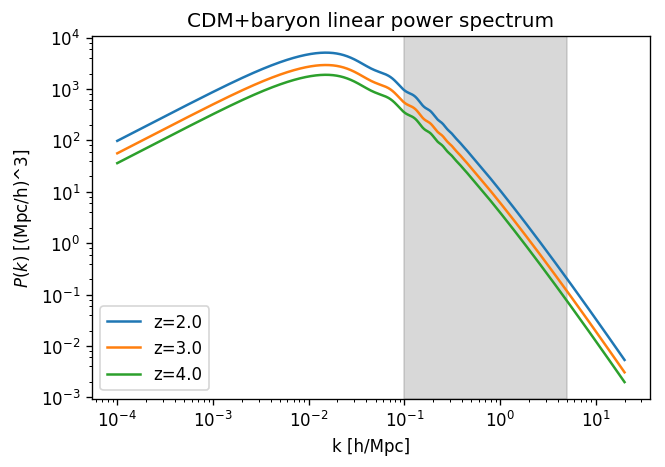

In [5]:
Nz=len(zs)
plt.figure()
for iz in range(Nz): 
    z=zs[iz]
    plt.loglog(kh,Ph[iz],label='z='+str(z))
plt.title(r"CDM+baryon linear power spectrum")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$P(k)$ [(Mpc/h)^3]")
plt.legend()
plt.axvspan(0.1,5.0,alpha=0.3, color='gray')

## Fit a power-law (with running) to the high-k power spectrum

In [6]:
# use a single redshift
iz=1
# use a certain k range to fit
kh_fit_min=0.5
kh_fit_max=2.0
kh_fit= (kh > kh_fit_min) & (kh < kh_fit_max)
poly_deg1=np.polyfit(np.log(kh[kh_fit]), np.log(Ph[iz][kh_fit]), deg=1)
Ph_deg1 = np.poly1d(poly_deg1)
poly_deg2=np.polyfit(np.log(kh[kh_fit]), np.log(Ph[iz][kh_fit]), deg=2)
Ph_deg2 = np.poly1d(poly_deg2)

(0.1, 10000.0)

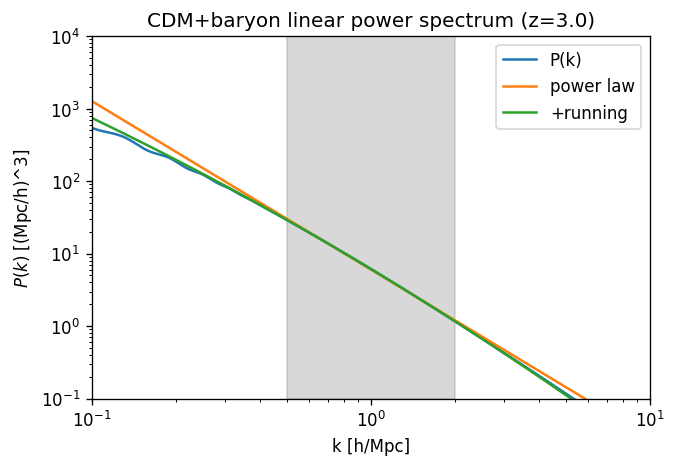

In [7]:
plt.figure()
plt.loglog(kh,Ph[iz],label='P(k)')
plt.loglog(kh,np.exp(Ph_deg1(np.log(kh))),label='power law')
plt.loglog(kh,np.exp(Ph_deg2(np.log(kh))),label='+running')
plt.title(r"CDM+baryon linear power spectrum (z="+str(zs[iz])+")")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$P(k)$ [(Mpc/h)^3]")
plt.legend()
plt.axvspan(kh_fit_min,kh_fit_max,alpha=0.3, color='gray')
plt.xlim(0.1,10.0)
plt.ylim(1e-1,1e4)

(0.5, 1.3)

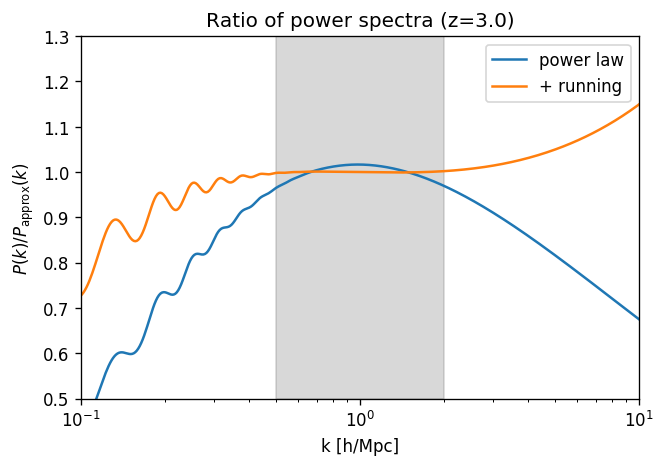

In [8]:
plt.figure()
plt.semilogx(kh,Ph[iz]/np.exp(Ph_deg1(np.log(kh))),label='power law')
plt.semilogx(kh,Ph[iz]/np.exp(Ph_deg2(np.log(kh))),label='+ running')
plt.title(r"Ratio of power spectra (z="+str(zs[iz])+")")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$P(k)/P_{\rm approx}(k)$")
plt.legend()
plt.axvspan(kh_fit_min,kh_fit_max,alpha=0.3, color='gray')
plt.xlim(0.1,10.0)
plt.ylim(0.5,1.3)

(0.9, 1.1)

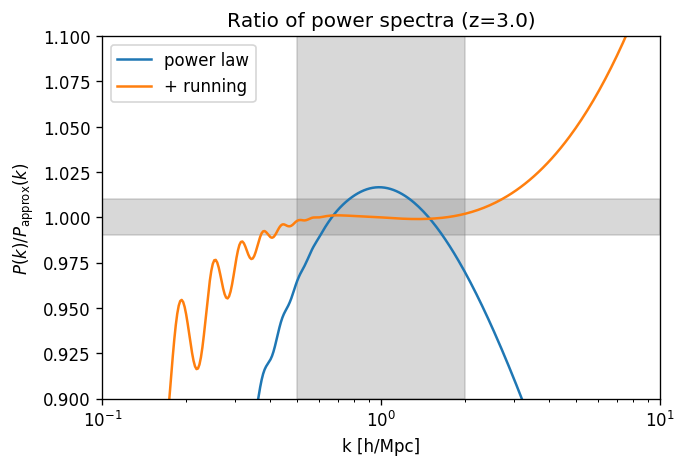

In [9]:
plt.figure()
plt.semilogx(kh,Ph[iz]/np.exp(Ph_deg1(np.log(kh))),label='power law')
plt.semilogx(kh,Ph[iz]/np.exp(Ph_deg2(np.log(kh))),label='+ running')
plt.title(r"Ratio of power spectra (z="+str(zs[iz])+")")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$P(k)/P_{\rm approx}(k)$")
plt.legend()
plt.axvspan(kh_fit_min,kh_fit_max,alpha=0.3, color='gray')
plt.axhspan(0.99,1.01,alpha=0.3, color='gray')
plt.xlim(0.1,10.0)
plt.ylim(0.9,1.1)

## Fit ratios with respect to fiducial cosmology

In [10]:
## Generate default cosmology
pars_def = camb.CAMBparams()
pars_def.set_cosmology(H0=67)
pars_def.set_matter_power(redshifts=zs, kmax=30.0)
results_def = camb.get_results(pars_def)
# need to specify a higher number of k points to have proper description at k ~ 1 h/Mpc
kh_def, _ , Ph_def = results_def.get_matter_power_spectrum(have_power_spectra=True,var1=fluid,var2=fluid,npoints=1000,maxkh=20)

Note: redshifts have been re-sorted (earliest first)


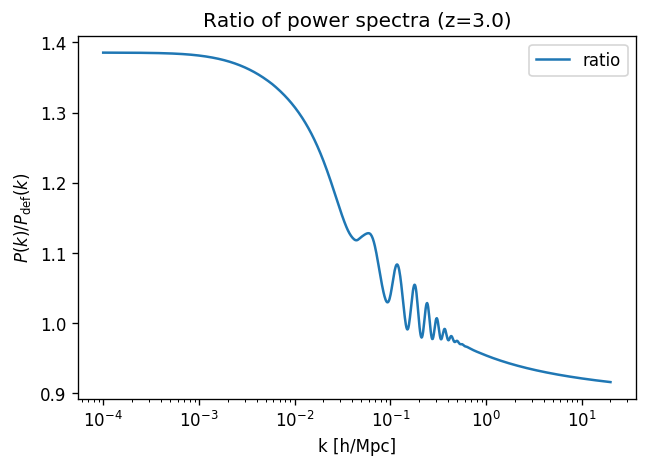

In [11]:
plt.figure()
plt.semilogx(kh,Ph[iz]/Ph_def[iz],label='ratio')
plt.title(r"Ratio of power spectra (z="+str(zs[iz])+")")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$P(k)/P_{\rm def}(k)$")
plt.legend()

### Compute ratio in units of Mpc, not Mpc/h

In [12]:
h=pars.H0/100.0
h_def=pars_def.H0/100.0

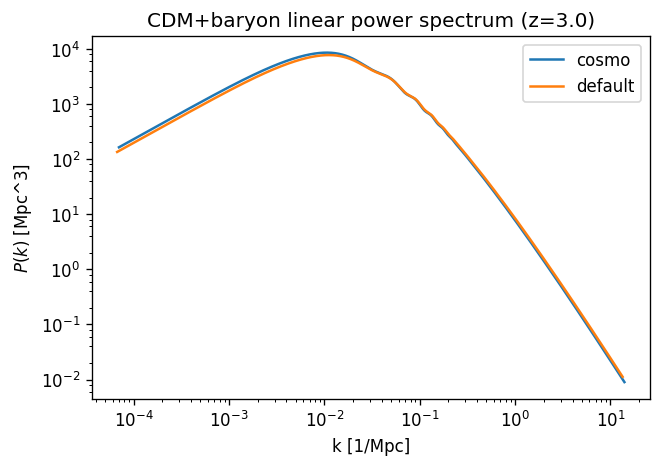

In [13]:
plt.figure()
plt.loglog(kh*h,Ph[iz]/h**3,label='cosmo')
plt.loglog(kh_def*h_def,Ph_def[iz]/h_def**3,label='default')
plt.title(r"CDM+baryon linear power spectrum (z="+str(zs[iz])+")")
plt.xlabel("k [1/Mpc]")
plt.ylabel(r"$P(k)$ [Mpc^3]")
plt.legend()

In [14]:
k=np.logspace(-4,1,1000)
Pk=np.interp(k/h,kh,Ph[iz]/h**3)
Pk_def=np.interp(k/h_def,kh_def,Ph_def[iz]/h_def**3)

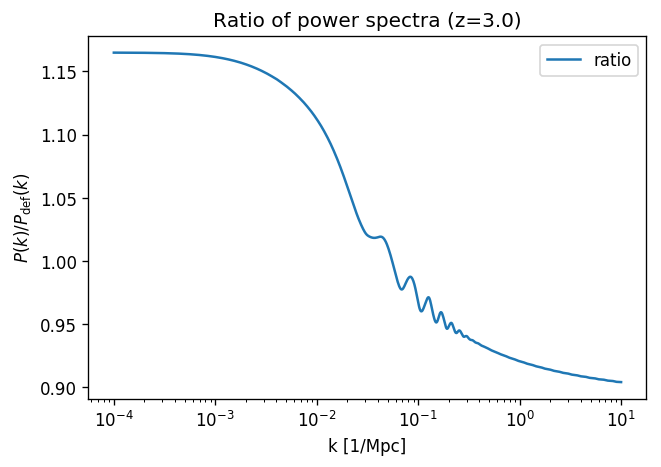

In [15]:
plt.figure()
plt.semilogx(k,Pk/Pk_def,label='ratio')
plt.title(r"Ratio of power spectra (z="+str(zs[iz])+")")
plt.xlabel("k [1/Mpc]")
plt.ylabel(r"$P(k)/P_{\rm def}(k)$")
plt.legend()
#plt.xlim(0.1,10.0)
#plt.ylim(0.9,1.0)

### Fit ratio

In [16]:
# use a certain k range to fit
k_fit_min=0.8
k_fit_max=1.2
k_fit= (k > k_fit_min) & (k < k_fit_max)
poly_deg1=np.polyfit(np.log(k[k_fit]), np.log(Pk[k_fit]/Pk_def[k_fit]), deg=1)
Pk_ratio_deg1 = np.poly1d(poly_deg1)
poly_deg2=np.polyfit(np.log(k[k_fit]), np.log(Pk[k_fit]/Pk_def[k_fit]), deg=2)
Pk_ratio_deg2 = np.poly1d(poly_deg2)

(0.95, 1.05)

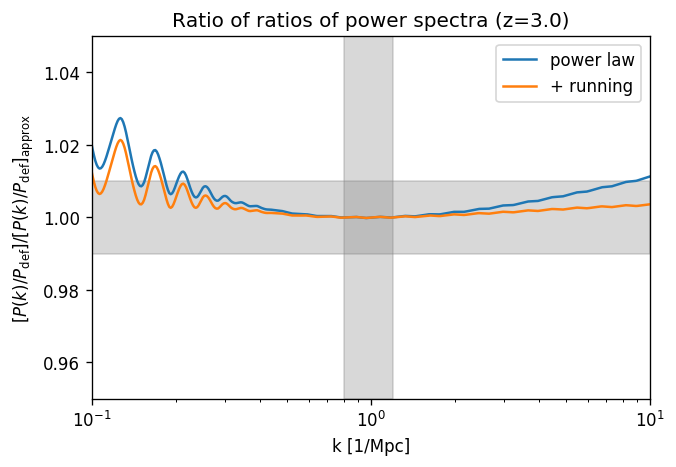

In [17]:
plt.figure()
plt.semilogx(k,Pk/Pk_def/np.exp(Pk_ratio_deg1(np.log(k))),label='power law')
plt.semilogx(k,Pk/Pk_def/np.exp(Pk_ratio_deg2(np.log(k))),label='+ running')
plt.title(r"Ratio of ratios of power spectra (z="+str(zs[iz])+")")
plt.xlabel("k [1/Mpc]")
plt.ylabel(r"$[P(k)/P_{\rm def}] / [P(k)/P_{\rm def}]_{\rm approx}$")
plt.axvspan(k_fit_min,k_fit_max,alpha=0.3, color='gray')
plt.axhspan(0.99,1.01,alpha=0.3, color='gray')
plt.legend()
plt.xlim(0.1,10.0)
plt.ylim(0.95,1.05)

### Now repeat using homemade function

In [18]:
import fit_pk

In [19]:
k_ratio = k[k_fit]
P_ratio = Pk[k_fit]/Pk_def[k_fit]
# try two different polynomials
P_ratio_deg1=fit_pk.fit_polynomial(0.8,1.2,k_ratio,P_ratio,deg=1)
P_ratio_deg2=fit_pk.fit_polynomial(0.8,1.2,k_ratio,P_ratio,deg=2)

(0.95, 1.05)

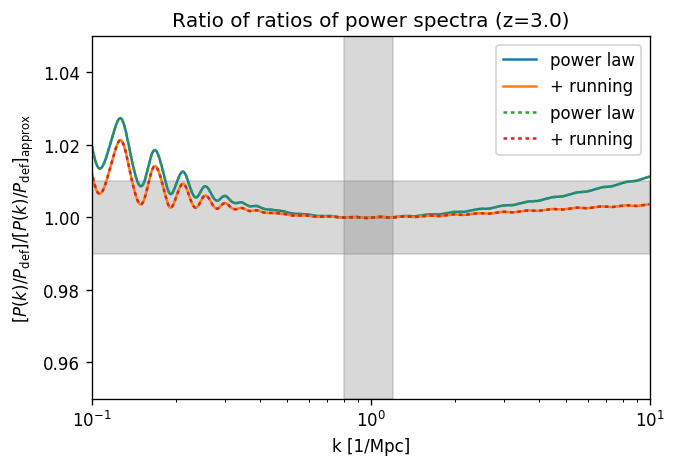

In [20]:
plt.figure()
plt.semilogx(k,Pk/Pk_def/np.exp(Pk_ratio_deg1(np.log(k))),'-',label='power law')
plt.semilogx(k,Pk/Pk_def/np.exp(Pk_ratio_deg2(np.log(k))),'-',label='+ running')
plt.semilogx(k,Pk/Pk_def/np.exp(P_ratio_deg1(np.log(k))),':',label='power law')
plt.semilogx(k,Pk/Pk_def/np.exp(P_ratio_deg2(np.log(k))),':',label='+ running')
plt.title(r"Ratio of ratios of power spectra (z="+str(zs[iz])+")")
plt.xlabel("k [1/Mpc]")
plt.ylabel(r"$[P(k)/P_{\rm def}] / [P(k)/P_{\rm def}]_{\rm approx}$")
plt.axvspan(k_fit_min,k_fit_max,alpha=0.3, color='gray')
plt.axhspan(0.99,1.01,alpha=0.3, color='gray')
plt.legend()
plt.xlim(0.1,10.0)
plt.ylim(0.95,1.05)